In [1]:
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [6]:
n_classes = 100
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 100)


In [9]:
model = Sequential()

model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 53s 135ms/step - loss: 41.0070 - accuracy: 0.0434 - val_loss: 4.4860 - val_accuracy: 0.0624
Epoch 2/10
391/391 [==============================] - 54s 137ms/step - loss: 3.9934 - accuracy: 0.1264 - val_loss: 4.4538 - val_accuracy: 0.0816
Epoch 3/10
391/391 [==============================] - 66s 170ms/step - loss: 3.2898 - accuracy: 0.2490 - val_loss: 4.6376 - val_accuracy: 0.0904
Epoch 4/10
391/391 [==============================] - 69s 175ms/step - loss: 2.5550 - accuracy: 0.3992 - val_loss: 5.1136 - val_accuracy: 0.0919
Epoch 5/10
391/391 [==============================] - 71s 183ms/step - loss: 1.8846 - accuracy: 0.5615 - val_loss: 5.8539 - val_accuracy: 0.0954
Epoch 6/10
391/391 [==============================] - 69s 177ms/step - loss: 1.3543 - accuracy: 0.6924 - val_loss: 6.5988 - val_accuracy: 0.0947
Epoch 7/10
391/391 [==============================] - 72s 184ms/step - loss: 0.9764 - accuracy: 0.7833 - val_loss: 7.4010 - val_a

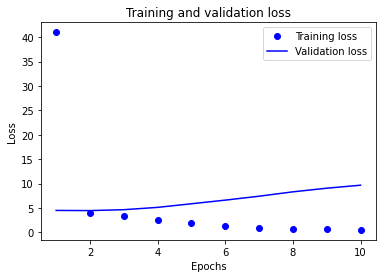

In [10]:
history_dict = history.history
history_dict.keys()

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()